# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
df = pd.read_csv('kmeans_pollution.csv')

In [4]:
df.head()

,Country,City,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,cluster_label
0,Russian Federation,Praskoveya,1,36,0,51,3.0
1,Brazil,Presidente Dutra,1,5,1,41,3.0
2,Italy,Priolo Gargallo,1,39,2,66,3.0
3,Poland,Przasnysz,1,34,0,20,2.0
4,France,Punaauia,0,22,0,6,3.0


# Data Splitting

Data splitting pada klasifikasi ini menggunakan cross validation untuk menghindari terjadinya overfitting pada output nantinya

In [5]:
# Pisahkan fitur dan target
X = df.drop(columns=['cluster_label', 'City', 'Country'])  
y = df['cluster_label']

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)  

Kode ini digunakan untuk memastikan bahwa data numerik pada kolom cluster_label berupa kategorikal

## Cross Validation

In [7]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pemilihan Model

Pada klasifikasi ini saya menggunakan 2 model klasifikasi yaitu knn dan decision tree, yang dimana nantinya kedua model ini akan dibadingkan berdasarkan akurasi yang dihasilkan dari berbagai macam metode evaluasi

In [8]:
# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(random_state=42)

# Prediksi dengan cross-validation
knn_pred = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
dt_pred = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

# Evaluasi Model

In [9]:
print("Akurasi tiap fold:", knn_pred)
print("Rata-rata akurasi:", knn_pred.mean())

Akurasi tiap fold: [0.59961645 0.59024078 0.5964202  0.58802217 0.58567775]
Rata-rata akurasi: 0.5919954698450777


In [10]:
print("Akurasi tiap fold:", dt_pred)
print("Rata-rata akurasi:", dt_pred.mean())

Akurasi tiap fold: [0.58576603 0.58896228 0.59301087 0.58418585 0.58354646]
Rata-rata akurasi: 0.5870942992674331


2 cell code diatas menunjukkan hasil akurasi menggunakan cross validation. Berdasarkan hasil yang diberikan dapat kita lihat bahwa knn memberikan hasil yang lebih optimal dibandingkan dengan decision tree, **decision tree dengan score rata2 adalah 0,58** sementara **knn memberikan akurasi rata-rata sebesar 0,59**

In [11]:
# Lakukan prediksi menggunakan cross-validation
knn_pred_cm = cross_val_predict(knn, X, y, cv=kf)
dt_pred_cm = cross_val_predict(dt, X, y, cv=kf)

# Hitung confusion matrix
knn_cm = confusion_matrix(y, knn_pred_cm)
dt_cm = confusion_matrix(y, dt_pred_cm)

## Confussion Matrix

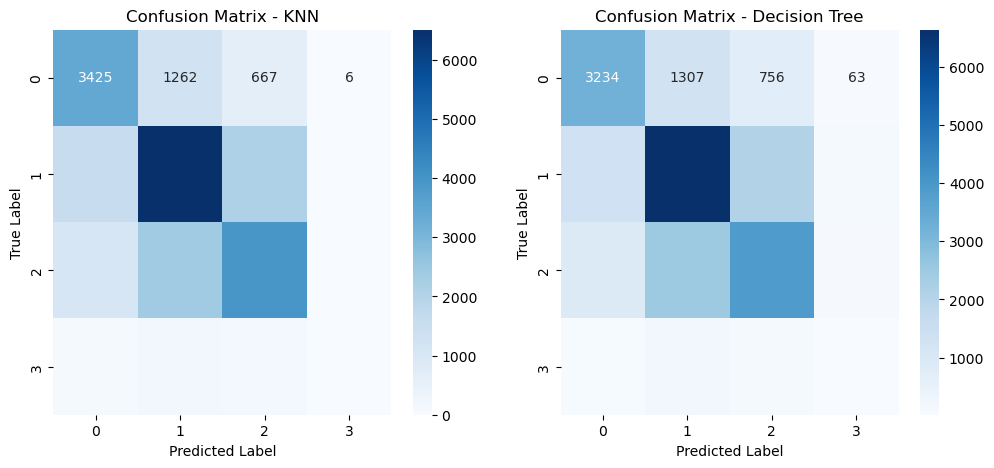

In [12]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - KNN")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - Decision Tree")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

Berdasarkan confusion matrix, KNN menunjukkan performa lebih baik dalam memprediksi kelas 0 dibanding Decision Tree, dengan jumlah prediksi benar lebih tinggi (3,425 vs 3,234). Decision Tree lebih sering salah memprediksi kelas 0 sebagai kelas 3 (63 vs 6), yang menunjukkan kelemahan dalam membedakan kelas ini. Kedua model mengalami kesulitan dalam membedakan kelas 1 dan 2, terlihat dari banyaknya prediksi silang di antara kedua kelas tersebut. Selain itu, kelas 3 memiliki jumlah data yang sangat sedikit, sehingga sulit diprediksi dengan baik oleh kedua model. Secara keseluruhan, KNN lebih stabil dalam memprediksi kelas mayoritas, sedangkan Decision Tree cenderung memiliki lebih banyak kesalahan dalam klasifikasi kelas minoritas.

## Precision, Recall, F1 Score

In [13]:
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='weighted'),
        recall_score(y_true, y_pred, average='weighted'),
        f1_score(y_true, y_pred, average='weighted')
    ]

# Buat DataFrame evaluasi
df_metrics = pd.DataFrame(
    [evaluate_model(y, knn_pred_cm), evaluate_model(y, dt_pred_cm)],
    index=["KNN", "Decision Tree"],
    columns=["Akurasi", "Precision", "Recall", "F1 Score"]
)

# Tampilkan hasil evaluasi
print("Tabel Evaluasi Model:")
display(df_metrics)

Tabel Evaluasi Model:


,Akurasi,Precision,Recall,F1 Score
KNN,0.591996,0.582923,0.591996,0.586520
Decision Tree,0.587095,0.583683,0.587095,0.584911


# Kesimpulan

Berdasarkan hasil klasifikasi, **KNN** menunjukkan performa yang lebih maksimal dibandingkan **Decision Tree**, meskipun perbedaannya tidak terlalu signifikan. Rata-rata nilai dari **confusion matrix** yang diperoleh adalah **0,58**, yang mengindikasikan bahwa model masih dapat ditingkatkan. Salah satu faktor yang mungkin memengaruhi hasil ini adalah **ketidakseimbangan skala pada data numerik**. Seharusnya, dilakukan proses **scaling** terlebih dahulu untuk menyamakan rentang nilai, sehingga model dapat belajar lebih optimal dan menghasilkan prediksi yang lebih akurat.